In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpo-data-ii/TPO_Data_III.xlsx


This data set is a collection of golf scores over the past 15 years from an annual golf tournament that has been going on since the 1980s. The event takes place every fall on the Canadian shores of Lake Erie. Family and friends gather at this annual golf tournament coming from all over the country. The golf, perhaps once the reason for the gather, is simply now an excuse for old friends to see each other and discuss all sorts of topics over the course of the weekend. The conversations, beverages, stories and laughs around the fire place, a stones throw away from the cold waters of Lake Erie are fantastic - the golf, not so much. After the tournament concludes on Saturday, the scores get recorded into a "TPO Database" - an excel file created by one of the founding members. Most of the scores are wished to be forgotten by the golfers, but to their dismay, there is now a fantastic database of scores that is ripe for insights.

In [2]:
#Reading in our dataframes
raw_tpo_df = pd.read_excel('/kaggle/input/tpo-data-ii/TPO_Data_III.xlsx', 'Player Data')
hole_info_df = pd.read_excel('/kaggle/input/tpo-data-ii/TPO_Data_III.xlsx', 'Hole Info')

In [3]:
#Inspecting our dataframes
raw_tpo_df

,Name,Year,Group,Score 1,Putts 1,Score 2,Putts 2,Score 3,Putts 3,Score 4,...,Score 16,Putts 16,Score 17,Putts 17,Score 18,Putts 18,Back 9 Score,Back 9 Putts,Total Score,Total Putts
0,Zimmy,2022,1,4.0,2.0,5.0,2.0,4.0,2.0,6.0,...,4.0,2.0,4.0,2.0,5.0,1.0,40.0,14.0,79,29.0
1,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,4.0,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0
2,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,5.0,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0
3,JWS,2022,2,5.0,1.0,8.0,2.0,4.0,2.0,9.0,...,5.0,3.0,4.0,2.0,6.0,3.0,47.0,18.0,100,36.0
4,Hurrican Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,3.0,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Wild Bill,1995,3,11.0,NaN,6.0,NaN,4.0,NaN,5.0,...,5.0,NaN,4.0,NaN,5.0,NaN,43.0,0.0,95,0.0
413,Dave K,1995,1,6.0,NaN,6.0,NaN,4.0,NaN,8.0,...,3.0,NaN,6.0,NaN,5.0,NaN,42.0,0.0,96,0.0
414,Pedro,1995,2,6.0,NaN,6.0,NaN,4.0,NaN,6.0,...,4.0,NaN,6.0,NaN,6.0,NaN,53.0,0.0,102,0.0
415,Russ Kee,1995,1,8.0,NaN,4.0,NaN,6.0,NaN,9.0,...,5.0,NaN,6.0,NaN,7.0,NaN,53.0,0.0,114,0.0


In [4]:
#setting the hole number as the index for this dataframe
hole_info_df=hole_info_df.set_index('Hole Number',)
hole_info_df.head()

,Par,Yardage
Hole Number,,
1,4,305
2,4,325
3,3,152
4,5,437
5,3,200


Let us first start with our raw tpo dataframe

In [5]:
#lets ensure that all columns have no blank spaces
raw_tpo_df.columns = raw_tpo_df.columns.str.replace(" ", "_")
raw_tpo_df.head()

#much better

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
0,Zimmy,2022,1,4.0,2.0,5.0,2.0,4.0,2.0,6.0,...,4.0,2.0,4.0,2.0,5.0,1.0,40.0,14.0,79,29.0
1,EBS,2022,2,6.0,2.0,5.0,1.0,3.0,1.0,6.0,...,4.0,2.0,2.0,1.0,4.0,2.0,39.0,14.0,81,29.0
2,Edward J,2022,1,7.0,2.0,8.0,3.0,5.0,2.0,5.0,...,5.0,1.0,4.0,1.0,6.0,3.0,43.0,14.0,95,31.0
3,JWS,2022,2,5.0,1.0,8.0,2.0,4.0,2.0,9.0,...,5.0,3.0,4.0,2.0,6.0,3.0,47.0,18.0,100,36.0
4,Hurrican Lu,2022,3,5.0,2.0,6.0,2.0,5.0,2.0,7.0,...,3.0,1.0,5.0,2.0,6.0,1.0,49.0,17.0,101,36.0


In [6]:
#Checking out the dtypes in our dataframe
raw_tpo_df.dtypes

Name              object
Year               int64
Group              int64
Score_1          float64
Putts_1          float64
Score_2          float64
Putts_2          float64
Score_3          float64
Putts_3          float64
Score_4          float64
Putts_4          float64
Score_5          float64
Putts_5          float64
Score_6          float64
Putts_6          float64
Score_7          float64
Putts_7          float64
Score_8          float64
Putts_8          float64
Score_9          float64
Putts_9          float64
Front_9_Score      int64
Front_9_Putts      int64
Score_10         float64
Putts_10         float64
Score_11         float64
Putts_11         float64
Score_12         float64
Putts_12         float64
Score_13         float64
Putts_13         float64
Score_14         float64
Putts_14         float64
Score_15         float64
Putts_15         float64
Score_16         float64
Putts_16         float64
Score_17         float64
Putts_17         float64
Score_18         float64


In [7]:
#Inspecting the "Names" column
#Appears we have some duplicate names, "Pedro, Pedro II", "94, 94 II, 94 III" are all the same person
#and a Typo - "Hurrican Lu" should be "Hurricane Lu"
#and a data type issue - 94 should be a string as it is a nickname
raw_tpo_df['Name'].unique()

array(['Zimmy', 'EBS', 'Edward J', 'JWS', 'Hurrican Lu', 'Brad M',
       'Jim C', 94, 'James B', 'Sir Ian', 'Re', 'GWS', 'General',
       'Wild Bill', 'Jimmy R', 'John B', 'Marc C', 'Jeremy D', 'Pedro',
       'Pinball', 'Matty G', 'Young Dave', 'Scott M', 'Mark K',
       'White Rat', 'BCS', 'Kevy', 'Kevo', 'Sam', 'Jimmy C', 'Carmen',
       'Jeremy Max', 'Tommy S', 'Terry W', 'Pedro II', 'Kent M', '94 II',
       'Jim Paw', '94 III', 'Chris K', 'Mark C', 'Dave K', 'Mike C',
       'Russ Kee', 'Duane S', 'Mike W', 'Leo'], dtype=object)

In [8]:
#Lets make sure all Names are strings
raw_tpo_df['Name']=[str(name) for name in raw_tpo_df['Name']]

In [9]:
#starting with 47 unique names, that includes the duplicates
raw_tpo_df['Name'].nunique()

47

In [10]:
#changing a typo and 3 duplicate names so they are just one name
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['Hurrican Lu'], 'Hurricane Lu')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['Pedro II'], 'Pedro')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['94 II'], '94')
raw_tpo_df['Name'] = raw_tpo_df['Name'].replace(['94 III'], '94')

In [11]:
#down to 44 now which is correct 
raw_tpo_df['Name'].nunique()

44

Checking For Nulls
* We see that some columns have nulls but there arent that many. Highest percentage of nulls in a column is 7%, for the 'Putts 13' column.

* Let us go ahead and insert the average score / putt for each hole that has a null.

In [12]:
#checking for Nulls - looks like some columns have nulls 
raw_tpo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           417 non-null    object 
 1   Year           417 non-null    int64  
 2   Group          417 non-null    int64  
 3   Score_1        413 non-null    float64
 4   Putts_1        400 non-null    float64
 5   Score_2        413 non-null    float64
 6   Putts_2        401 non-null    float64
 7   Score_3        413 non-null    float64
 8   Putts_3        401 non-null    float64
 9   Score_4        413 non-null    float64
 10  Putts_4        401 non-null    float64
 11  Score_5        414 non-null    float64
 12  Putts_5        402 non-null    float64
 13  Score_6        413 non-null    float64
 14  Putts_6        401 non-null    float64
 15  Score_7        413 non-null    float64
 16  Putts_7        401 non-null    float64
 17  Score_8        412 non-null    float64
 18  Putts_8   

In [13]:
#Lets see what the average score per hole was and fill the NAs with that number.
for column in raw_tpo_df.columns[3:]:
    average_score = round(raw_tpo_df[f'{column}'].mean(),2)
    print(f"Average for {column} was: {average_score}")
    raw_tpo_df[f'{column}'] = raw_tpo_df[f'{column}'].fillna(average_score)

Average for Score_1 was: 6.07
Average for Putts_1 was: 1.82
Average for Score_2 was: 6.14
Average for Putts_2 was: 1.94
Average for Score_3 was: 4.61
Average for Putts_3 was: 2.03
Average for Score_4 was: 6.72
Average for Putts_4 was: 2.01
Average for Score_5 was: 5.34
Average for Putts_5 was: 1.96
Average for Score_6 was: 6.07
Average for Putts_6 was: 2.08
Average for Score_7 was: 6.01
Average for Putts_7 was: 1.94
Average for Score_8 was: 6.08
Average for Putts_8 was: 2.03
Average for Score_9 was: 4.63
Average for Putts_9 was: 1.88
Average for Front_9_Score was: 51.56
Average for Front_9_Putts was: 17.01
Average for Score_10 was: 6.68
Average for Putts_10 was: 2.07
Average for Score_11 was: 4.65
Average for Putts_11 was: 1.95
Average for Score_12 was: 5.44
Average for Putts_12 was: 1.81
Average for Score_13 was: 5.49
Average for Putts_13 was: 1.94
Average for Score_14 was: 4.07
Average for Putts_14 was: 1.95
Average for Score_15 was: 5.43
Average for Putts_15 was: 1.88
Average for Sc

In [14]:
#changing our dataframe name to cleaned_tpo_df
cleaned_tpo_df=raw_tpo_df
cleaned_tpo_df

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Score_16,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts
0,Zimmy,2022,1,4.0,2.00,5.0,2.00,4.0,2.00,6.0,...,4.0,2.00,4.0,2.00,5.0,1.00,40.0,14.0,79,29.0
1,EBS,2022,2,6.0,2.00,5.0,1.00,3.0,1.00,6.0,...,4.0,2.00,2.0,1.00,4.0,2.00,39.0,14.0,81,29.0
2,Edward J,2022,1,7.0,2.00,8.0,3.00,5.0,2.00,5.0,...,5.0,1.00,4.0,1.00,6.0,3.00,43.0,14.0,95,31.0
3,JWS,2022,2,5.0,1.00,8.0,2.00,4.0,2.00,9.0,...,5.0,3.00,4.0,2.00,6.0,3.00,47.0,18.0,100,36.0
4,Hurricane Lu,2022,3,5.0,2.00,6.0,2.00,5.0,2.00,7.0,...,3.0,1.00,5.0,2.00,6.0,1.00,49.0,17.0,101,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Wild Bill,1995,3,11.0,1.82,6.0,1.94,4.0,2.03,5.0,...,5.0,1.84,4.0,1.89,5.0,1.98,43.0,0.0,95,0.0
413,Dave K,1995,1,6.0,1.82,6.0,1.94,4.0,2.03,8.0,...,3.0,1.84,6.0,1.89,5.0,1.98,42.0,0.0,96,0.0
414,Pedro,1995,2,6.0,1.82,6.0,1.94,4.0,2.03,6.0,...,4.0,1.84,6.0,1.89,6.0,1.98,53.0,0.0,102,0.0
415,Russ Kee,1995,1,8.0,1.82,4.0,1.94,6.0,2.03,9.0,...,5.0,1.84,6.0,1.89,7.0,1.98,53.0,0.0,114,0.0


In [15]:
#quick check for NAs
cleaned_tpo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           417 non-null    object 
 1   Year           417 non-null    int64  
 2   Group          417 non-null    int64  
 3   Score_1        417 non-null    float64
 4   Putts_1        417 non-null    float64
 5   Score_2        417 non-null    float64
 6   Putts_2        417 non-null    float64
 7   Score_3        417 non-null    float64
 8   Putts_3        417 non-null    float64
 9   Score_4        417 non-null    float64
 10  Putts_4        417 non-null    float64
 11  Score_5        417 non-null    float64
 12  Putts_5        417 non-null    float64
 13  Score_6        417 non-null    float64
 14  Putts_6        417 non-null    float64
 15  Score_7        417 non-null    float64
 16  Putts_7        417 non-null    float64
 17  Score_8        417 non-null    float64
 18  Putts_8   

Insights

In [16]:
from matplotlib import pyplot as plt

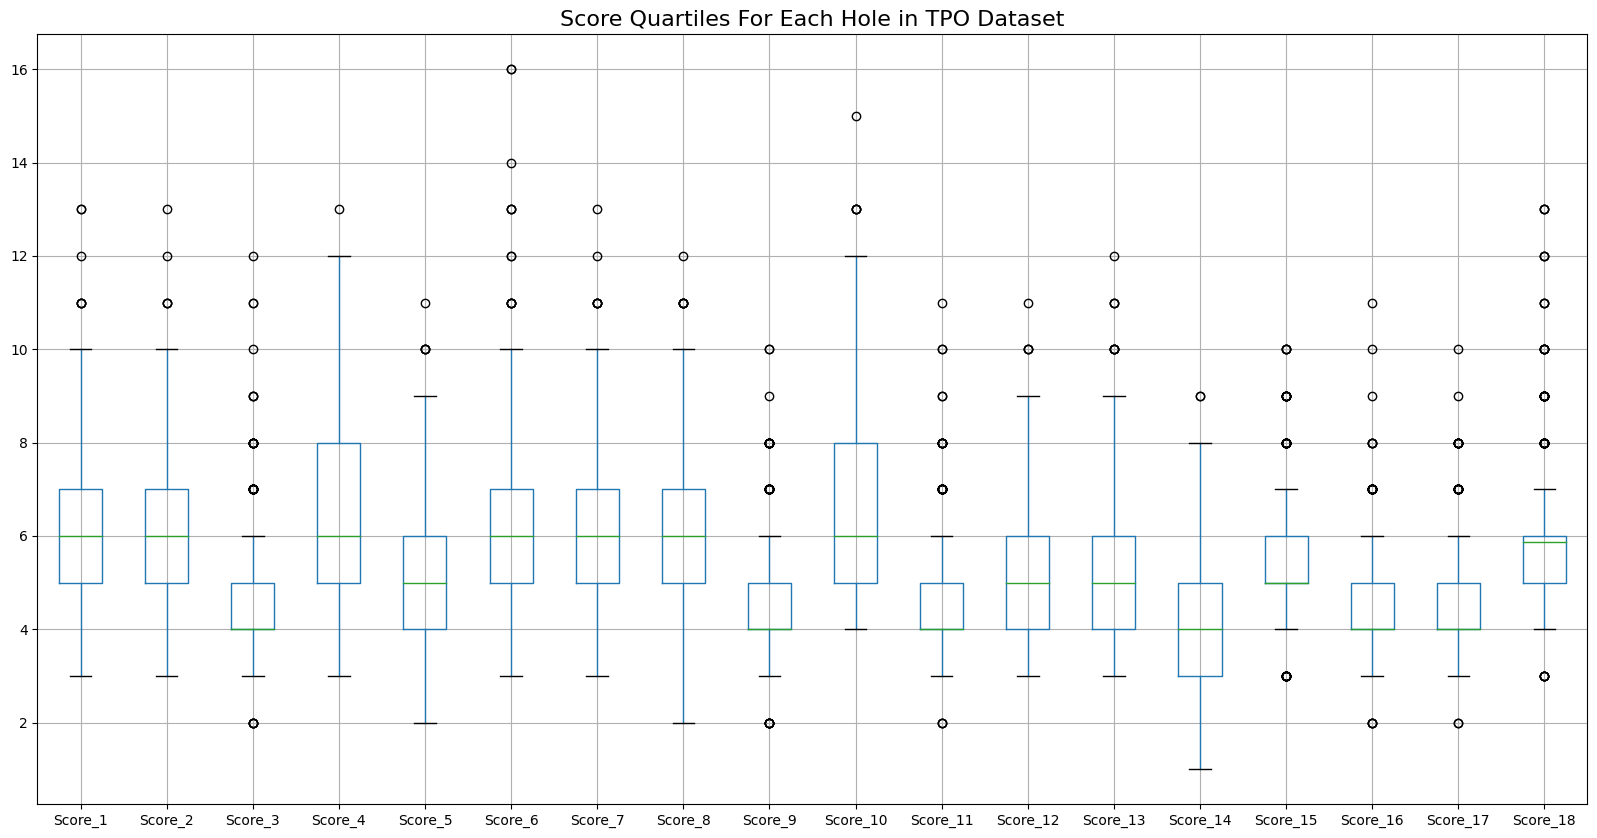

In [17]:
score_cols = ['Score_1','Score_2','Score_3','Score_4','Score_5','Score_6',
             'Score_7','Score_8','Score_9','Score_10','Score_11','Score_12',
             'Score_13','Score_14','Score_15','Score_16','Score_17','Score_18']
plt.figure(figsize=(20,10))
cleaned_tpo_df[score_cols].boxplot()
plt.title("Score Quartiles For Each Hole in TPO Dataset", fontsize=16)
plt.show()

Here we see a box plot for each hole on the course. The box itself shows us the interquartile range, or the middle 50% of scores. The median score falls within the box, indicating that 50% of the scores were higher than this score and 50% were lower. So for the first hole, 75% of the scores were lower than a 7 - with the highest score being a 13 (which to no surprise is being recognized as an outlier)!

We see the easiest hole being a number 14, with 25% of golfers making par here, which is 3. We also see here that a hole in one was recorded, because we see the minimum score was a 1! 

The widest boxes occur at holes 4 and 10, which tracks because these are the two longest holes on the course and therefore higher scores will be had here. 

Note, I don't want to remove the outliers - every stroke counts and its fun to see how high scores can go on each hole.



Let's examine the Hole Info Dataframe and do some manipulation there.

In [18]:
#Introducing the Course Information Dataframe
hole_info_df

,Par,Yardage
Hole Number,,
1,4,305
2,4,325
3,3,152
4,5,437
5,3,200
6,4,329
7,4,310
8,4,315
9,3,162


Let's find out what the par is (the average number of strokes it should take to play) and the total distance of the course.

In [19]:
par_for_course=hole_info_df['Par'].sum()
length_of_course=hole_info_df['Yardage'].sum()

print("The par for the course is:", par_for_course)
print("The length of the course is:",length_of_course, "yards long.")

The par for the course is: 66
The length of the course is: 4605 yards long.


 We see par is 66, lower than a normal course because this course is a lot shorter than the average - only 4600 yards!

Now lets add a new column to our dataframe, "average score" for each hole, and see how distance / par affects it.

In [20]:
#grabbing all the columns that begin with score to help create a new DF
score_cols = [col for col in cleaned_tpo_df if col.startswith('Score')]
score_cols

['Score_1',
 'Score_2',
 'Score_3',
 'Score_4',
 'Score_5',
 'Score_6',
 'Score_7',
 'Score_8',
 'Score_9',
 'Score_10',
 'Score_11',
 'Score_12',
 'Score_13',
 'Score_14',
 'Score_15',
 'Score_16',
 'Score_17',
 'Score_18']

In [21]:
#creating a new df that shows just the scores that we will loop through to get the average
scores_df=cleaned_tpo_df[score_cols]
scores_df

,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,Score_8,Score_9,Score_10,Score_11,Score_12,Score_13,Score_14,Score_15,Score_16,Score_17,Score_18
0,4.0,5.0,4.0,6.0,4.0,4.0,4.0,4.0,4.0,7.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0
1,6.0,5.0,3.0,6.0,6.0,3.0,5.0,4.0,4.0,6.0,3.0,7.0,5.0,4.0,4.0,4.0,2.0,4.0
2,7.0,8.0,5.0,5.0,4.0,4.0,6.0,8.0,5.0,6.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,6.0
3,5.0,8.0,4.0,9.0,5.0,6.0,5.0,7.0,4.0,9.0,5.0,6.0,5.0,3.0,4.0,5.0,4.0,6.0
4,5.0,6.0,5.0,7.0,7.0,6.0,5.0,6.0,5.0,10.0,5.0,6.0,5.0,4.0,5.0,3.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,11.0,6.0,4.0,5.0,5.0,4.0,7.0,5.0,5.0,4.0,6.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0
413,6.0,6.0,4.0,8.0,7.0,4.0,6.0,6.0,7.0,6.0,3.0,5.0,4.0,4.0,6.0,3.0,6.0,5.0
414,6.0,6.0,4.0,6.0,5.0,6.0,6.0,6.0,4.0,7.0,8.0,6.0,6.0,4.0,6.0,4.0,6.0,6.0
415,8.0,4.0,6.0,9.0,6.0,8.0,7.0,5.0,8.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,7.0


In [22]:
#for each column in our scores df, get the average, round it, and append it to an empty list of averages.
average_scores=[]
for col in scores_df:
    avg=round(cleaned_tpo_df[col].mean(),2)
    average_scores.append(avg)
print(average_scores)

[6.07, 6.14, 4.61, 6.72, 5.34, 6.07, 6.01, 6.08, 4.63, 6.68, 4.65, 5.44, 5.49, 4.07, 5.43, 4.43, 4.56, 5.87]


In [23]:
#Adding our new column called "Average_Score" to our hole info dataframe.
hole_info_df["Average_Score"]=average_scores

In [24]:
#we now see our dataframe with our Average_Score column.
hole_info_df

,Par,Yardage,Average_Score
Hole Number,,,
1,4,305,6.07
2,4,325,6.14
3,3,152,4.61
4,5,437,6.72
5,3,200,5.34
6,4,329,6.07
7,4,310,6.01
8,4,315,6.08
9,3,162,4.63


In [25]:
#first getting some initial statistical numbers about this data frame
hole_info_df.describe()

,Par,Yardage,Average_Score
count,18.000000,18.000000,18.000000
mean,3.666667,255.833333,5.460556
std,0.594089,89.924315,0.805302
min,3.000000,113.000000,4.070000
25%,3.000000,168.750000,4.635000
50%,4.000000,279.000000,5.465000
75%,4.000000,313.750000,6.070000
max,5.000000,437.000000,6.720000


* We see that the average of the average scores is right around 5.5 shots per hole
* The minimum average score for a hole was 4.07, which occurred on the shortest hole on the course
* The maximum average score was a whooping 6.72, which occurred on the only par 5 on the course, which is also the longest hole.

In [26]:
#figuring out the correlation between yardage and score
hole_info_df['Yardage'].corr(hole_info_df['Average_Score'])

0.9697546138805635

To be expected there is almost a perfect correlation between how long the hole is and the average score

Adding Column "Shots_Over_Par"
* Now that we know the par for the course lets add in a new column called "Shots_Over_Par" that will tell us how many shots a golfer was from shooting even par.

In [27]:
cleaned_tpo_df["Shots_Over_Par"]=cleaned_tpo_df['Total_Score']-par_for_course

In [28]:
#figuring out the tournaments i have participated in 
griffins_tpo=cleaned_tpo_df[cleaned_tpo_df['Name']=='GWS']
griffins_tpo

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts,Shots_Over_Par
11,GWS,2020,4,5.0,1.0,5.0,2.0,6.0,2.0,5.0,...,3.0,4.0,1.0,5.0,2.0,43.0,18.0,82,31.0,16
31,GWS,2019,3,5.0,2.0,4.0,1.0,4.0,2.0,5.0,...,1.0,5.0,2.0,4.0,1.0,41.0,16.0,80,31.0,14
49,GWS,2018,4,6.0,2.0,6.0,2.0,5.0,1.0,6.0,...,2.0,3.0,2.0,4.0,1.0,35.0,13.0,81,27.0,15
69,GWS,2017,6,5.0,1.0,4.0,1.0,4.0,1.0,5.0,...,1.0,4.0,2.0,4.0,1.0,40.0,14.0,81,26.0,15
90,GWS,2016,4,6.0,2.0,5.0,2.0,3.0,1.0,5.0,...,2.0,3.0,1.0,5.0,2.0,39.0,14.0,78,28.0,12


In [29]:
#figuring out my own average putts 
griffins_average_putts = round(cleaned_tpo_df[cleaned_tpo_df["Name"] == 'GWS']['Total_Putts'].mean(),2)
griffins_average_putts

28.6

In [30]:
#figuring out the tournaments i have participated in 
griffins_tpo=cleaned_tpo_df[cleaned_tpo_df['Name']=='GWS']
griffins_tpo

,Name,Year,Group,Score_1,Putts_1,Score_2,Putts_2,Score_3,Putts_3,Score_4,...,Putts_16,Score_17,Putts_17,Score_18,Putts_18,Back_9_Score,Back_9_Putts,Total_Score,Total_Putts,Shots_Over_Par
11,GWS,2020,4,5.0,1.0,5.0,2.0,6.0,2.0,5.0,...,3.0,4.0,1.0,5.0,2.0,43.0,18.0,82,31.0,16
31,GWS,2019,3,5.0,2.0,4.0,1.0,4.0,2.0,5.0,...,1.0,5.0,2.0,4.0,1.0,41.0,16.0,80,31.0,14
49,GWS,2018,4,6.0,2.0,6.0,2.0,5.0,1.0,6.0,...,2.0,3.0,2.0,4.0,1.0,35.0,13.0,81,27.0,15
69,GWS,2017,6,5.0,1.0,4.0,1.0,4.0,1.0,5.0,...,1.0,4.0,2.0,4.0,1.0,40.0,14.0,81,26.0,15
90,GWS,2016,4,6.0,2.0,5.0,2.0,3.0,1.0,5.0,...,2.0,3.0,1.0,5.0,2.0,39.0,14.0,78,28.0,12


<Axes: >

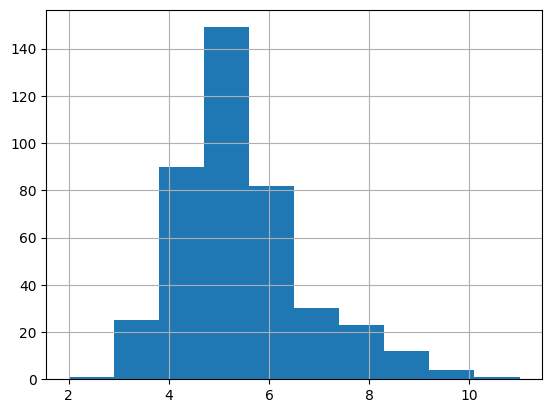

In [31]:
cleaned_tpo_df['Score_5'].hist() 